<a href="https://colab.research.google.com/github/CodingAlex12/Inteligencia_Artificial/blob/main/IA_Primer_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

In [3]:
G = nx.DiGraph()
G.add_nodes_from(['Cozumel', 'Ciudad del Carmen', 'Angel Albino Corzo', 'Minatitlan', 'Veracruz', 'Acapulco', 'Puebla', 'CDMX', 'Morelia', 'Uruapan',
                  'San Luis Potosi', 'Tampico', 'Piedras Negras', 'Culiacan', 'Abraham Gonzalez', 'Nogales', 'Guaymas', 'Loreto', 'Manuel Marquez de Leon'
                  , 'Los Cabos'])
G.add_edges_from([
('Cozumel', 'Tampico', {'weight': 17}),
('Ciudad del Carmen', 'Cozumel', {'weight': 15}),
('Angel Albino Corzo', 'Ciudad del Carmen', {'weight': 11}),
('Angel Albino Corzo', 'Minatitlan', {'weight': 15}),
('Angel Albino Corzo', 'Acapulco', {'weight': 1}),
('Minatitlan', 'Ciudad del Carmen', {'weight': 16}),
('Minatitlan', 'Veracruz', {'weight': 18}),
('Acapulco', 'Morelia', {'weight': 14}),
('Acapulco', 'Uruapan', {'weight': 14}),
('Puebla', 'Veracruz', {'weight': 12}),
('Puebla', 'Acapulco', {'weight': 19}),
('CDMX', 'Acapulco', {'weight': 4}),
('Morelia', 'CDMX', {'weight': 15}),
('Morelia', 'San Luis Potosi', {'weight': 11}),
('Uruapan', 'Culiacan', {'weight': 15}),
('San Luis Potosi', 'Abraham Gonzalez', {'weight': 15}),
('Tampico', 'Puebla', {'weight': 7}),
('Tampico', 'CDMX', {'weight': 8}),
('Tampico', 'San Luis Potosi', {'weight': 11}),
('Piedras Negras', 'San Luis Potosi', {'weight': 11}),
('Piedras Negras', 'Tampico', {'weight': 16}),
('Culiacan', 'Piedras Negras', {'weight': 8}),
('Culiacan', 'Guaymas', {'weight': 16}),
('Abraham Gonzalez', 'Piedras Negras', {'weight': 15}),
('Nogales', 'Abraham Gonzalez', {'weight': 6}),
('Guaymas', 'Abraham Gonzalez', {'weight': 18}),
('Guaymas', 'Nogales', {'weight': 5}),
('Guaymas', 'Loreto', {'weight': 13}),
('Loreto', 'Manuel Marquez de Leon', {'weight': 15}),
('Manuel Marquez de Leon', 'Culiacan', {'weight': 14}),
('Manuel Marquez de Leon', 'Los Cabos', {'weight': 10}),
])

In [4]:


# Crea un grafo dirigido
US_G = nx.DiGraph()

# Agrega nodos de ciudades estadounidenses
US_G.add_nodes_from(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose', 'Seattle', 'Denver', 'Boston', 'Atlanta', 'Miami'])

# Agrega conexiones entre ciudades con pesos
US_G.add_edges_from([
    ('New York', 'Chicago', {'weight': 15}),
    ('New York', 'Los Angeles', {'weight': 30}),
    ('Chicago', 'Houston', {'weight': 20}),
    ('Houston', 'Phoenix', {'weight': 25}),
    ('Phoenix', 'San Diego', {'weight': 10}),
    ('Philadelphia', 'San Antonio', {'weight': 22}),
    ('San Antonio', 'San Diego', {'weight': 28}),
    ('Dallas', 'San Jose', {'weight': 35}),
    ('San Francisco', 'Los Angeles', {'weight': 15}),
    ('Seattle', 'San Francisco', {'weight': 20}),
    ('Denver', 'Chicago', {'weight': 18}),
    ('Boston', 'New York', {'weight': 10}),
    ('Atlanta', 'Miami', {'weight': 12}),
    ('Miami', 'Houston', {'weight': 30}),
    ('Dallas', 'Atlanta', {'weight': 25}),
    ('Boston', 'Denver', {'weight': 22}),
])




In [13]:
class GraphSearch ():
  def __init__(self,grafo,entrada,salida,limit):
    self.G = grafo
    self.entrada = entrada
    self.salida= salida
    self.limit = limit
    self.mainpath =[]

  def valores(self):
    print("inicio:", self.entrada)
    print("salida:", self.salida)
    print("limit:", self.limit)

  def verificacion(self):
    verificacion1 = True
    verificacion2 = True

    while verificacion1:
        self.entrada = input("Ingrese la ciudad origen: ")
        if self.entrada.lower() not in map(str.lower, self.G.nodes): #implementación de .lower para hacer la entrada minusculas para su comparación
            print("Ciudad de origen no válida.")           #implementacion de "map" que usa como primer valor una función y como segundo valor las secuencias (listas, tuplas, conjuntos, grafos )
        else:
            print("Ciudad de origen válida.")
            verificacion1 = False

    while verificacion2:
        self.salida = input("Ingrese la ciudad destino: ")
        if self.salida.lower() not in map(str.lower, self.G.nodes):
            print("Ciudad destino no válida.")
        else:
            print("Ciudad destino válida.")
            verificacion2 = False

  def menu(self):
    nx.draw(self.G, pos=nx.shell_layout(self.G), with_labels=True,node_size=1200,font_size=8)

  def DLS(self,G=None, start=None, target=None, limit=None,path=None): #depth limited search 
    G=self.G
    start= self.entrada
    target=self.salida
    limit=self.limit
    path=[]
    frontier = [(start,0)]
    reached = []
    while frontier:
      node, depth = frontier.pop(0)
      reached.append(node)

      if node == target:
        path.append(node)
        return path

      elif depth > limit:
        return "cutoff"

      else:
        cutoff = False
        for neighbor in G.neighbors(node):
          if neighbor not in reached:
            frontier.append((neighbor,depth+1))
            result = DLS(G, neighbor, target, limit - 1, path + [node])
            if result == "cutoff":
                cutoff = True
            elif result != "failure":
                return result

        if cutoff:
          return "cutoff"
        else:
          return "failure"
      print(reached)

  def bfs(self,G, start_node=None, target_node=None): #breadth first search 

    start_node=self.entrada
    target_node=self.salida
    G=self.G
    frontier = [start_node]
    reached = []

    while frontier:
        node = frontier.pop(0)
        reached.append(node)

        if node == target_node:
            return reached

        for successor in G.successors(node):
            if successor not in reached and successor not in frontier:
                frontier.append(successor)

    print("No se encontró un camino desde {} hasta {}.".format(start_node, target_node))
    return None
  
    path = bfs(G, start_node, target_node)

    if path:
        print("Camino encontrado:", path)
  
def dfs(self,graph= None, start= None, target=None, visited=None, path=None): #depth search
  graph = self.G
  start = self.entrada 
  target = self.salida

  if visited is None:
    visited = set()
  if path is None:
    path = []

  visited.add(start)
  path = path + [start]

  if start == target:
    return path

  for neighbor in graph.neighbors(start):
    if neighbor not in visited:
      new_path = self.dfs(graph, neighbor, target, visited, path)
      if new_path:
        return new_path

  return None

# Llamar al algoritmo DFS
path = dfs()

# Imprimir el resultado
if path:
    print("Camino encontrado:", path)
else:
    print("No se encontró un camino desde", start, "hasta", target)






TypeError: dfs() missing 1 required positional argument: 'self'

In [ ]:
prueba= GraphSearch(G,None,None,5)

In [ ]:
prueba.valores()

inicio: None
salida: None
limit: 5


In [ ]:
prueba.verificacion()

Ingrese la ciudad origen: Cozumel
Ciudad de origen válida.
Ingrese la ciudad destino: Acapulco
Ciudad destino válida.


In [ ]:
prueba.DLS()

['Cozumel', 'Tampico', 'Puebla', 'Acapulco']

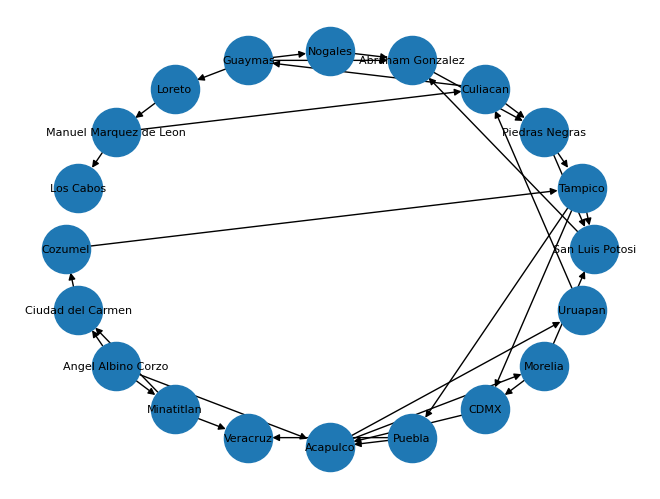

In [ ]:
prueba.menu()

In [ ]:
verificacion1 = True
verificacion2 = True

while verificacion1:
    entrada = input("Ingrese la ciudad origen: ")
    if entrada.lower() not in map(str.lower, G.nodes): #implementación de .lower para hacer la entrada minusculas para su comparación
        print("Ciudad de origen no válida.")           #implementacion de "map" que usa como primer valor una función y como segundo valor las secuencias (listas, tuplas, conjuntos, grafos )
    else:
        print("Ciudad de origen válida.")
        verificacion1 = False

while verificacion2:
    salida = input("Ingrese la ciudad destino: ")
    if salida.lower() not in map(str.lower, G.nodes):
        print("Ciudad destino no válida.")
    else:
        print("Ciudad destino válida.")
        verificacion2 = False


KeyboardInterrupt: Interrupted by user

In [ ]:
#Algoritmo de búsqueda límite de profundidad
def DLS(G, start, target, limit,path=[]):
  frontier = [(start,0)]
  reached = []
  while frontier:
    node, depth = frontier.pop(0)
    reached.append(node)

    if node == target:
      path.append(node)
      return path

    elif depth > limit:
      return "cutoff"

    else:
      cutoff = False
      for neighbor in G.neighbors(node):
        if neighbor not in reached:
          frontier.append((neighbor,depth+1))
          result = DLS(G, neighbor, target, limit - 1, path + [node])
          if result == "cutoff":
              cutoff = True
          elif result != "failure":
              return result

      if cutoff:
        return "cutoff"
      else:
        return "failure"

    print(reached)


# Entrada de usuario para valores de inicio, objetivo y límite

#start = input("Ingrese el nodo de inicio: ")
start="Cozumel"
#start.lower().capitalize()
#target = input("Ingrese el nodo objetivo: ")
target="Acapulco"
#target.lower().capitalize()
#limit = int(input("Ingrese el límite de profundidad: "))
limit=5
# Llamada al algoritmo DLS
result = DLS(G, start, target, limit)

print("Resultado de la búsqueda:", result)

In [ ]:
nx.draw(G, pos=nx.shell_layout(G), with_labels=True,node_size=1200,font_size=8)

In [ ]:
# Calcular la disposición de los nodos utilizando spring_layout con una constante de fuerza k
pos = nx.spring_layout(G, k=7)
nx.draw(G, pos=pos, with_labels=True, node_size=1500, font_size=8)
plt.show()
